# ゼロから作るSVM


## 原理

### 1. 識別器の定義
適切に $ w, b $ を定めて以下の識別器を作りたい。

$$
y_s = \text{sgn} \left( \frac{w^T x_s + b}{\|w\|} \right)
$$

### 2. 定式化
①の制約下で $ M $ を最大化する $ w, b $ を定めれば良い

$$
y_i \left( \frac{w^T x_i + b}{\|w\|} \right) \geq M \quad \text{(1)}
$$

これはマージンで正規化した②の制約下で $ \frac{1}{2} \|w\|^2 $ を最小化することと同じ

$$
y_i (w^T x_i + b) \geq 1 \quad \text{(2)}
$$

### 3. ラグランジュ未定乗数法
これをラグランジュ未定乗数法で解けば良い

$$
L(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_i \alpha_i \left( y_i (w^T x_i + b) - 1 \right) \quad \text{(3)}
$$

### 4. KKT条件と双対問題
KKT条件より③は④の双対問題に置き換えられる

$$
L(\alpha) = \sum_i \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j x_i^T x_j \quad \text{(4)}
$$

$$
制約条件：\sum_i \alpha_i y_i = 0
$$

まとめると、

$$
L(\alpha) = \alpha^T 1 - \frac{1}{2} \alpha^T H \alpha \quad \text{(5)}
$$

$$
制約条件：\alpha^T y = 0
$$

### 5. 解法
⑤は解析的に解くのが難しいので、二次計画法 / SMO / 勾配降下法などで解く。

---

### 補足
- ソフトマージンの場合は②にスラック変数を導入する。
- カーネルトリックを使う場合は、適切なカーネル関数を選んで⑤の内積計算に使う。



## データセット準備

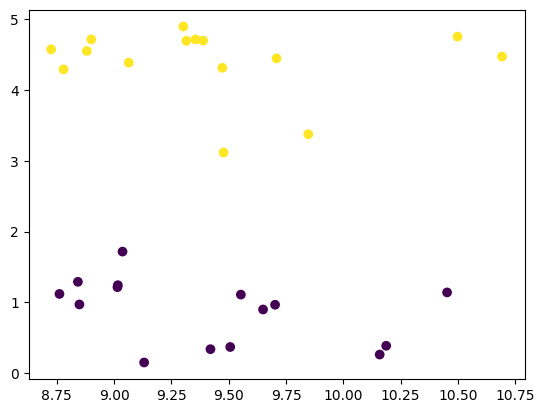

In [2]:

%matplotlib inline
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt

X_train, Y_train = make_blobs(centers=2, cluster_std=0.5, random_state=4, n_samples=30, n_features=2)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)



## ハードマージン

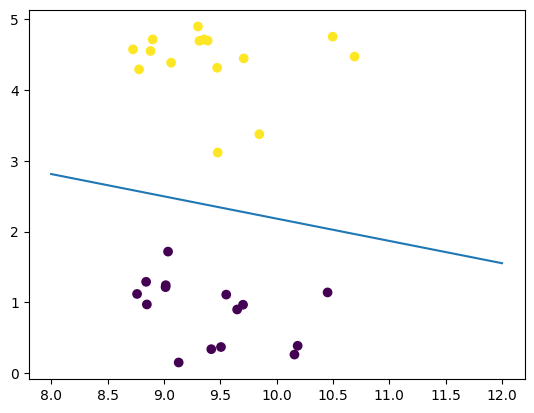

In [3]:
# scikit-learnの場合
import numpy as np
from sklearn.svm import SVC

model = SVC(kernel="linear",C=10e10)
result = model.fit(X_train, Y_train)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)

result_x0 = np.linspace(8,12)
result_x1 = (-result.coef_[0,0]*result_x0 - result.intercept_)/result.coef_[0,1]
plt.plot(result_x0,result_x1)


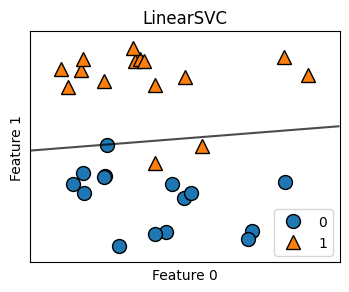

In [5]:

from sklearn.svm import LinearSVC
import mglearn

model = LinearSVC(max_iter=1000)  #1000だと収束しない
result = model.fit(X_train, Y_train)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

mglearn.plots.plot_2d_separator(result, X_train, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], Y_train, ax=ax,)
ax.set_title(result.__class__.__name__)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()